In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
df = pd.read_csv('tims_dataset_fatalities.csv')
df = df.drop(['2012','2013','2019','2020','2021'],axis=1)
df[['2014','2015','2016','2017','2018']]=df[['2014','2015','2016','2017','2018']].apply(lambda x: x.str.replace(',', ''))
convert_dict = {'2014': float,
                '2015': float,
                '2016': float,
                '2017': float,
                '2018': float
                }
df[['2014','2015','2016','2017','2018']]=df[['2014','2015','2016','2017','2018']].astype(convert_dict)

In [ ]:
df[(df['2014']==0)] # 85 
df[(df['2015']==0)]# 78 
df[(df['2016']==0)] # 70
df[(df['2017']==0)] # 61
df[(df['2018']==0)] # 68


# df['Average']=df[['2014','2015','2016','2017','2018']].astype(convert_dict).mean(axis=1)

In [ ]:
df_yr_avg = df[['2014','2015','2016','2017','2018']].astype(convert_dict).mean(axis=0)
df_yr_avg = df_yr_avg.reset_index().rename(columns={'index':'Year',0:'Average'})
fig = px.line(df_yr_avg, x="Year", y="Average",
     labels={
             "Year": "Year",
             "Average": "Average collisions per year",
         },template='plotly_dark')
fig.show()

In [ ]:
df_filtered = df[(df['2014']>0) & (df['2015']>0) & (df['2016']>0) & (df['2017']>0) & (df['2018']>0)].reset_index(drop=True)

In [ ]:
top_10_df = df_filtered.sort_values(by=['Average'],ascending=False).iloc[1:,:].head(10)

In [ ]:
fig = px.bar(top_10_df, x='City', y='Average',template='plotly_dark',
         labels={
             "City": "City",
             "Average": "Average collisions per year",
         })
fig.show()

In [ ]:
df_filtered

In [1]:
from pyrosm import OSM
import pyrosm
import pandas as pd
import importlib
importlib.reload(pyrosm)
from pyrosm import OSM
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/Users/abajaj/miniconda3/envs/capstone/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


## [OSM Data for San Francisco](https://download.bbbike.org/osm/bbbike/SanFrancisco/)

<AxesSubplot: >

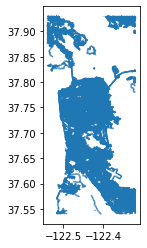

In [2]:
# fp = get_data("sanfrancisco", directory="/Users/abajaj/Downloads/capstone")
# pyrosm.pyrosm.OSM(filepath, bounding_box=None)
osm = OSM(filepath='/Users/abajaj/Downloads/capstone/SanFrancisco.osm.pbf')
drive_net = osm.get_network(network_type="driving")
drive_net.plot()

In [3]:
drive_net.columns

Index(['access', 'area', 'bicycle', 'bridge', 'busway', 'cycleway', 'foot', 'highway', 'junction', 'lanes', 'lit', 'maxspeed', 'motorcar', 'motor_vehicle', 'name', 'oneway', 'overtaking', 'psv', 'ref', 'service', 'sidewalk', 'smoothness', 'surface', 'tracktype', 'tunnel', 'turn', 'width', 'id', 'timestamp', 'version', 'tags', 'osm_type', 'geometry', 'length'], dtype='object')

In [4]:
drive_net.head(100)

,access,area,bicycle,bridge,busway,cycleway,foot,highway,junction,lanes,lit,maxspeed,motorcar,motor_vehicle,name,oneway,overtaking,psv,ref,service,sidewalk,smoothness,surface,tracktype,tunnel,turn,width,id,timestamp,version,tags,osm_type,geometry,length
0,None,None,no,None,None,None,None,motorway,None,4,None,65 mph,None,None,Bayshore Freeway,yes,None,None,US 101,None,None,None,None,None,None,None,None,4311275,0,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.40673 37.65521, -122.40...",328.0
1,None,None,no,yes,None,None,None,motorway,None,4,None,65 mph,None,None,Bayshore Freeway,yes,None,None,US 101,None,None,None,None,None,None,None,None,4970206,0,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.40696 37.65523, -122.40...",259.0
2,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,Macondray Lane,None,None,None,None,None,None,None,None,None,None,None,None,5004035,0,-1,None,way,"MULTILINESTRING ((-122.41648 37.79905, -122.41...",75.0
3,None,None,no,yes,None,None,None,motorway,None,4,None,65 mph,None,None,Bayshore Freeway,yes,None,None,US 101,None,None,None,None,None,None,None,None,5071579,0,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.40691 37.65317, -122.40...",227.0
4,None,None,no,None,None,None,None,motorway,None,5,None,55 mph,None,None,James Lick Freeway,yes,None,None,US 101,None,None,None,concrete,None,None,None,None,5071582,0,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.39889 37.71689, -122.39...",234.0
5,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,6th Street,None,None,None,None,None,None,None,asphalt,None,None,None,None,7373728,0,-1,None,way,"MULTILINESTRING ((-122.40016 37.77429, -122.40...",102.0
6,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,Bluxome Street,None,None,None,None,None,None,None,asphalt,None,None,None,None,7373736,0,-1,"{""name:etymology:wikidata"":""Q107178240""}",way,"MULTILINESTRING ((-122.40016 37.77429, -122.39...",536.0
7,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,Nelson Rising Lane,None,None,None,None,None,None,None,None,None,None,None,None,7448875,0,-1,"{""name:etymology:wikidata"":""Q16105754""}",way,"MULTILINESTRING ((-122.39110 37.76967, -122.39...",147.0
8,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,Clarence St,None,None,None,None,None,no,None,asphalt,None,None,None,None,7852692,0,-1,"{""tiger:cfcc"":""A41"",""tiger:county"":""Contra Cos...",way,"MULTILINESTRING ((-122.39260 37.92775, -122.39...",42.0
9,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,Sanderling Island,None,None,None,None,None,None,None,None,None,None,None,None,7853051,0,-1,"{""tiger:cfcc"":""A41"",""tiger:county"":""Contra Cos...",way,"MULTILINESTRING ((-122.38102 37.90970, -122.38...",73.0


In [5]:
# str(drive_net.geometry[0])

In [6]:
type(drive_net.geometry[0])

shapely.geometry.multilinestring.MultiLineString

In [7]:
drive_net[drive_net['name']=='El Camino Real'].reset_index(drop=True)['tags'][8]

'{"hgv":"designated","hgv:national_network":"terminal_access","lanes:backward":"3","lanes:forward":"2","old_ref":"US 101","source:hgv:national_network":"Caltrans http://www.dot.ca.gov/hq/traffops/trucks/truckmap/","tiger:cfcc":"A31","tiger:county":"San Mateo, CA","tiger:name_base":"el Camino Real","tiger:name_base_1":"State Highway 82","tiger:name_direction_prefix":"S","turn:lanes:backward":"left||"}'

In [8]:
osm.conf.tags.available

['aerialway',
 'aeroway',
 'amenity',
 'boundary',
 'building',
 'craft',
 'emergency',
 'geological',
 'highway',
 'historic',
 'landuse',
 'leisure',
 'natural',
 'office',
 'power',
 'public_transport',
 'railway',
 'route',
 'place',
 'shop',
 'tourism',
 'waterway']

In [9]:
routes = ["bus", "ferry", "railway", "subway", "train", "tram", "trolleybus"]
rails = ["tramway", "light_rail", "rail", "subway", "tram"]
# highway	traffic_signals
bus = ['yes']
transit = osm.get_data_by_custom_criteria(custom_filter={
                                        'highway': ['*'],
#                                         'traffic_sign':['*'],
                                        'public_transport': True,},
                                        # Keep data matching the criteria above
                                        filter_type="keep",
                                        # Do not keep nodes (point data)    
                                        keep_nodes=False, 
                                        keep_ways=True, 
                                        keep_relations=True)

In [10]:
osm.conf.tags.available

['aerialway',
 'aeroway',
 'amenity',
 'boundary',
 'building',
 'craft',
 'emergency',
 'geological',
 'highway',
 'historic',
 'landuse',
 'leisure',
 'natural',
 'office',
 'power',
 'public_transport',
 'railway',
 'route',
 'place',
 'shop',
 'tourism',
 'waterway']

In [11]:
osm.conf.tags.route

['bicycle',
 'bus',
 'canoe',
 'detour',
 'duration',
 'evacuation',
 'ferry',
 'foot',
 'from',
 'hiking',
 'horse',
 'inline_skates',
 'light_rail',
 'mtb',
 'network',
 'piste',
 'railway',
 'road',
 'route',
 'running',
 'ski',
 'subway',
 'to',
 'train',
 'tracks',
 'tram',
 'trolleybus',
 'type']

In [12]:
highways = osm.get_data_by_custom_criteria(custom_filter={'highway':True},
                    # Keep data matching the criteria above
                    filter_type="keep",
                    # Do not keep nodes (point data)    
                    keep_nodes=False, 
                    keep_ways=True, 
                    keep_relations=False)

In [176]:
# highways.head()
highways.size

2919633

In [13]:
highways.head()

,access,area,bicycle,bridge,busway,cycleway,est_width,foot,footway,highway,junction,lanes,lit,maxspeed,motorcar,motor_vehicle,name,oneway,overtaking,path,psv,ref,service,segregated,sidewalk,smoothness,surface,tracktype,tunnel,turn,width,id,timestamp,version,tags,osm_type,geometry
0,None,None,no,None,None,None,None,None,None,motorway,None,4,None,65 mph,None,None,Bayshore Freeway,yes,None,None,None,US 101,None,None,None,None,None,None,None,None,None,4311275,0,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.40673 37.65521, -122.40..."
1,None,None,no,yes,None,None,None,None,None,motorway,None,4,None,65 mph,None,None,Bayshore Freeway,yes,None,None,None,US 101,None,None,None,None,None,None,None,None,None,4970206,0,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.40696 37.65523, -122.40..."
2,None,None,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,Macondray Lane,None,None,None,None,None,None,None,None,None,None,None,None,None,None,5004035,0,-1,None,way,"LINESTRING (-122.41648 37.79905, -122.41733 37..."
3,None,None,no,yes,None,None,None,None,None,motorway,None,4,None,65 mph,None,None,Bayshore Freeway,yes,None,None,None,US 101,None,None,None,None,None,None,None,None,None,5071579,0,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.40691 37.65317, -122.40..."
4,None,None,no,None,None,None,None,None,None,motorway,None,5,None,55 mph,None,None,James Lick Freeway,yes,None,None,None,US 101,None,None,None,None,concrete,None,None,None,None,5071582,0,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.39889 37.71689, -122.39..."


In [38]:
from IPython.display import display
for col in list(highways.columns):
    print(col)
    display(highways[col].value_counts(dropna=False,normalize=True).rename_axis('unique_values')
            .reset_index(name='counts'))
  

access


,unique_values,counts
0,None,0.930591
1,private,0.041504
2,no,0.008529
3,customers,0.007414
4,destination,0.002864
5,designated,0.002864
6,yes,0.002306
7,permissive,0.002066
8,permit,0.001787
9,unknown,0.000038


area


,unique_values,counts
0,None,0.995235
1,yes,0.004752
2,no,0.000013


bicycle


,unique_values,counts
0,None,0.936712
1,no,0.028032
2,yes,0.020112
3,designated,0.012495
4,dismount,0.002028
5,private,0.000342
6,permissive,0.000266
7,discouraged,0.000013


bridge


,unique_values,counts
0,None,0.983576
1,yes,0.016006
2,movable,0.000215
3,boardwalk,0.000190
4,gangway,0.000013


busway


,unique_values,counts
0,None,0.999823
1,lane,0.000127
2,yes,0.000051


cycleway


,unique_values,counts
0,None,0.973615
1,lane,0.012141
2,shared_lane,0.010240
3,track,0.001724
4,no,0.001115
5,crossing,0.000786
6,separate,0.000380


est_width


,unique_values,counts
0,None,0.999987
1,2,0.000013


foot


,unique_values,counts
0,None,0.949600
1,yes,0.029667
2,no,0.010607
3,designated,0.008947
4,permissive,0.000950
5,private,0.000228


footway


,unique_values,counts
0,None,0.819095
1,sidewalk,0.090611
2,crossing,0.089419
3,access_aisle,0.000520
4,ramp,0.000304
5,traffic_island,0.000025
6,square,0.000013
7,link,0.000013


highway


,unique_values,counts
0,service,0.300739
1,footway,0.297951
2,residential,0.144293
3,secondary,0.051249
4,tertiary,0.045141
5,primary,0.035066
6,steps,0.029414
7,path,0.021721
8,motorway_link,0.014764
9,unclassified,0.011482


junction


,unique_values,counts
0,None,0.998086
1,roundabout,0.001749
2,cloverleaf,0.000127
3,jughandle,0.000038


lanes


,unique_values,counts
0,None,0.841590
1,2,0.070385
2,3,0.040186
3,4,0.020745
4,1,0.019795
5,5,0.006184
6,6,0.000963
7,7,0.000101
8,8,0.000051


lit


,unique_values,counts
0,None,0.883549
1,yes,0.104437
2,no,0.012001
3,24/7,0.000013


maxspeed


,unique_values,counts
0,None,0.911632
1,25 mph,0.026195
2,35 mph,0.017793
3,30 mph,0.013116
4,20 mph,0.008237
5,50 mph,0.005006
6,45 mph,0.004397
7,65 mph,0.004081
8,55 mph,0.003624
9,40 mph,0.002459


motorcar


,unique_values,counts
0,None,0.999747
1,no,0.000241
2,designated,0.000013


motor_vehicle


,unique_values,counts
0,None,0.987517
1,no,0.006691
2,destination,0.002585
3,yes,0.001470
4,private,0.001103
5,permissive,0.000203
6,forestry,0.000139
7,designated,0.000114
8,permit,0.000063
9,emergency,0.000038


name


,unique_values,counts
0,None,0.669163
1,El Camino Real,0.004828
2,Geary Boulevard,0.003105
3,Market Street,0.002965
4,3rd Street,0.002953
...,...,...
6466,Cerro Court,0.000013
6467,Ysabel Drive,0.000013
6468,South Maple Avenue,0.000013
6469,Red Leaf Court,0.000013


oneway


,unique_values,counts
0,None,0.785006
1,yes,0.199115
2,no,0.015778
3,-1,0.000089
4,alternating,0.000013


overtaking


,unique_values,counts
0,None,0.999088
1,no,0.000786
2,backward,0.000063
3,forward,0.000038
4,yes,0.000025


path


,unique_values,counts
0,None,0.999987
1,track,0.000013


psv


,unique_values,counts
0,None,0.998821
1,yes,0.001179


ref


,unique_values,counts
0,None,0.976593
1,CA 82,0.005766
2,US 101,0.004955
3,CA 1,0.004334
4,CA 35,0.002535
5,I 280,0.001698
6,CA 131,0.001026
7,I 80,0.000710
8,US 101;CA 1,0.000583
9,I 580,0.000570


service


,unique_values,counts
0,None,0.861600
1,parking_aisle,0.102016
2,driveway,0.025156
3,alley,0.006818
4,busway,0.002205
5,drive-through,0.001711
6,emergency_access,0.000342
7,1,0.000051
8,fuel,0.000051
9,slipway,0.000025


segregated


,unique_values,counts
0,None,0.997212
1,no,0.002370
2,yes,0.000418


sidewalk


,unique_values,counts
0,None,0.902242
1,both,0.042834
2,right,0.025054
3,no,0.014156
4,separate,0.010886
5,left,0.003916
6,none,0.000684
7,yes,0.000228


smoothness


,unique_values,counts
0,None,0.998935
1,good,0.000317
2,intermediate,0.000266
3,bad,0.000203
4,excellent,0.000190
5,horrible,0.000038
6,very_horrible,0.000025
7,very_bad,0.000025


surface


,unique_values,counts
0,None,0.727217
1,asphalt,0.166939
2,concrete,0.056179
3,paved,0.019947
4,dirt,0.009074
5,paving_stones,0.006311
6,unpaved,0.003865
7,ground,0.002484
8,compacted,0.002028
9,wood,0.001217


tracktype


,unique_values,counts
0,None,0.997985
1,grade2,0.000697
2,grade1,0.000507
3,grade5,0.000355
4,grade3,0.000291
5,grade4,0.000165


tunnel


,unique_values,counts
0,None,0.994310
1,yes,0.003371
2,building_passage,0.002306
3,covered,0.000013


turn


,unique_values,counts
0,None,0.999480
1,right,0.000266
2,left,0.000101
3,through,0.000089
4,left;through,0.000025
5,through;right,0.000025
6,left;right,0.000013


width


,unique_values,counts
0,None,0.997985
1,1,0.000583
2,2,0.000279
3,0.5,0.000241
4,35',0.000101
5,2.4,0.000089
6,3,0.000076
7,1.5,0.000076
8,1.2,0.000051
9,4,0.000051


id


,unique_values,counts
0,4311275,0.000013
1,692740250,0.000013
2,692740260,0.000013
3,692740258,0.000013
4,692740257,0.000013
...,...,...
78904,406722492,0.000013
78905,406722490,0.000013
78906,406722488,0.000013
78907,406722486,0.000013


timestamp


,unique_values,counts
0,0,1.0


version


,unique_values,counts
0,-1,1.0


tags


,unique_values,counts
0,None,0.552168
1,"{""crossing"":""marked""}",0.029236
2,"{""crossing"":""unmarked""}",0.006805
3,"{""layer"":""1""}",0.005855
4,"{""layer"":""-1""}",0.003967
...,...,...
14905,"{""layer"":""2"",""tiger:cfcc"":""A63"",""tiger:county""...",0.000013
14906,"{""cycleway:both"":""shared_lane"",""lanes:backward...",0.000013
14907,"{""tiger:cfcc"":""A41"",""tiger:county"":""San Franci...",0.000013
14908,"{""tiger:cfcc"":""A41"",""tiger:county"":""San Franci...",0.000013


osm_type


,unique_values,counts
0,way,1.0


geometry


,unique_values,counts
0,"LINESTRING (-122.38890 37.61359, -122.38922 37...",0.000025
1,"LINESTRING (-122.38979 37.61222, -122.38947 37...",0.000025
2,"LINESTRING (-122.38949 37.61271, -122.38981 37...",0.000025
3,"LINESTRING (-122.38920 37.61310, -122.38888 37...",0.000025
4,"MULTILINESTRING ((-122.32419 37.88927, -122.32...",0.000013
...,...,...
78900,"MULTILINESTRING ((-122.46977 37.79028, -122.46...",0.000013
78901,"MULTILINESTRING ((-122.41953 37.63742, -122.41...",0.000013
78902,"MULTILINESTRING ((-122.41947 37.63732, -122.41...",0.000013
78903,"MULTILINESTRING ((-122.41940 37.63684, -122.41...",0.000013


In [39]:
# highways.name.value_counts()
# dir(highways[highways['name']=='El Camino Real'].reset_index(drop=True).geometry[5])
highways.columns

Index(['access', 'area', 'bicycle', 'bridge', 'busway', 'cycleway', 'est_width', 'foot', 'footway', 'highway', 'junction', 'lanes', 'lit', 'maxspeed', 'motorcar', 'motor_vehicle', 'name', 'oneway', 'overtaking', 'path', 'psv', 'ref', 'service', 'segregated', 'sidewalk', 'smoothness', 'surface', 'tracktype', 'tunnel', 'turn', 'width', 'id', 'timestamp', 'version', 'tags', 'osm_type', 'geometry'], dtype='object')

In [15]:
highways[highways['name']=='El Camino Real'].reset_index(drop=True).geometry[5].bounds
# tuples[1],tuples[0]
# tuples[3],tuples[2]
# highways[highways['name']=='El Camino Real'].reset_index(drop=True).geometry.apply(lambda x: x.length).describe()

(-122.3830068, 37.5931966, -122.3811665, 37.5947334)

In [16]:
public_transit = osm.get_data_by_custom_criteria(custom_filter={'public_transport':True},
                    # Keep data matching the criteria above
                    filter_type="keep",
                    # Do not keep nodes (point data)    
                    keep_nodes=False, 
                    keep_ways=True, 
                    keep_relations=False)

In [17]:
public_transit.head()
public_transit.size

7112